In [47]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

In [45]:
ls

EDA_PortESeguro.ipynb      spotify_tree.ipynb
XGBoost.ipynb              spotifyclassification.zip
data.csv*


In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [5]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [7]:
train,test = train_test_split(data,test_size = 0.15)

In [8]:
train.shape

(1714, 17)

In [9]:
test.shape

(303, 17)

In [20]:
red_blue = ['#19bb5e','#ef4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')

In [38]:
pos_tempo = data[data['target']==1]['tempo'] #where target = 1, select the tempo row feature
neg_tempo = data[data['target'] ==0]['tempo']

pos_danceability = data[data['target']==1]['danceability'] #where target = 1, select the tempo row feature
neg_danceability = data[data['target'] ==0]['danceability']

pos_duration_ms = data[data['target']==1]['duration_ms'] #where target = 1, select the tempo row feature
neg_duration_ms = data[data['target'] ==0]['duration_ms']

pos_loudness = data[data['target']==1]['loudness'] #where target = 1, select the tempo row feature
neg_loudness = data[data['target'] ==0]['loudness']

pos_speechiness = data[data['target']==1]['speechiness'] #where target = 1, select the tempo row feature
neg_speechiness = data[data['target'] ==0]['speechiness']

pos_valence = data[data['target']==1]['valence'] #where target = 1, select the tempo row feature
neg_valence = data[data['target'] ==0]['valence']

pos_energy = data[data['target']==1]['energy'] #where target = 1, select the tempo row feature
neg_energy = data[data['target'] ==0]['energy']

pos_acousticness = data[data['target']==1]['acousticness'] #where target = 1, select the tempo row feature
neg_acousticness = data[data['target'] ==0]['acousticness']

pos_key = data[data['target']==1]['key'] #where target = 1, select the tempo row feature
neg_key = data[data['target'] ==0]['key']

pos_instrumentalness = data[data['target']==1]['instrumentalness'] #where target = 1, select the tempo row feature
neg_instrumentalness = data[data['target'] ==0]['instrumentalness']

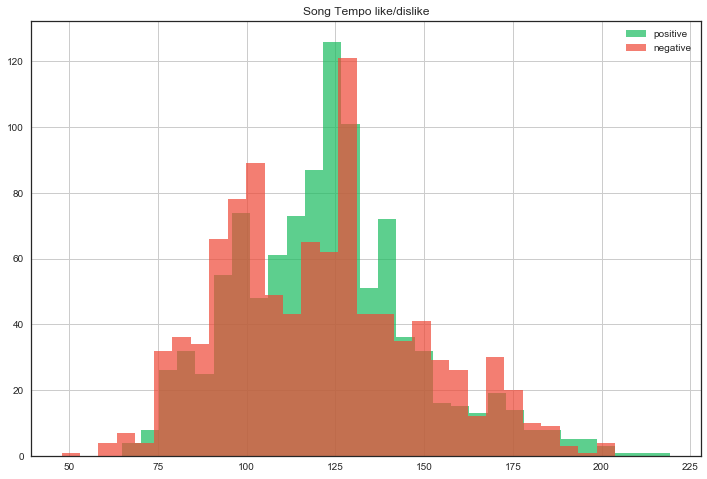

In [39]:

fig = plt.figure(figsize=(12,8));
plt.title('Song Tempo like/dislike');
pos_tempo.hist(alpha=0.7,bins=30,label='positive')
neg_tempo.hist(alpha=0.7,bins=30,label='negative')
plt.legend(loc='upper right')
plt.show()

In [23]:
pos_tempo.shape

(1020,)

In [24]:
neg_tempo.shape

(997,)

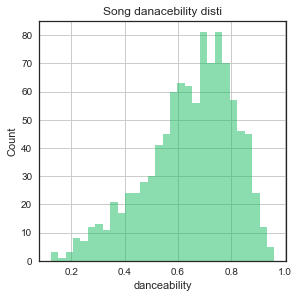

In [42]:
fig2 = plt.figure(figsize=(15,15));
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song danacebility disti')

pos_danceability.hist(alpha=0.5,bins=30)

In [99]:
c = DecisionTreeClassifier(min_samples_split=100)

In [100]:
features = list(train.columns)
print(dir(features))

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [101]:
features.pop(0)

'Unnamed: 0'

In [102]:
features.pop(-1)

'artist'

In [103]:
features.pop()

'song_title'

In [104]:
features.remove('time_signature')
features.remove('target')
features.remove('liveness')


In [105]:
features

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence']

In [106]:
X_train = train[features]
y_train = train['target']

X_test = test[features]
y_test = test['target']

In [107]:
dt = c.fit(X_train,y_train)

In [95]:
def show_tree(tree,features,path):
    f = io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams['figure.figsize']=(20,20)
    plt.imshow(img)
    
    

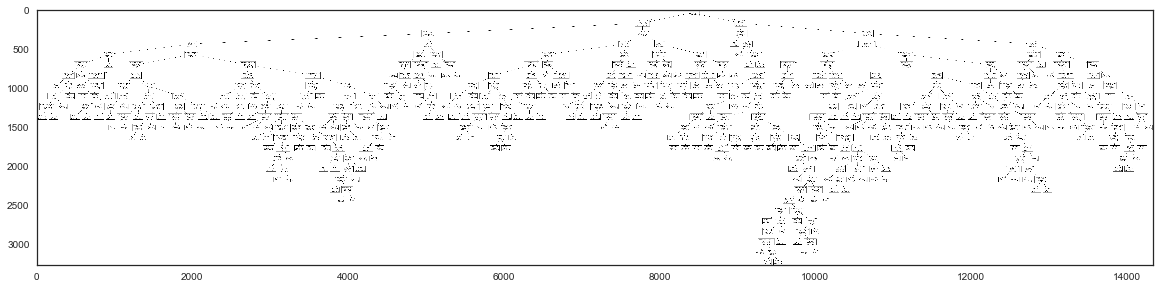

In [96]:
show_tree(dt,features,'dec_tree_01.png')

In [97]:
y_pred = c.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)*100
print(score)

67.3267326733
